# K-Means

## importing libraries and loading data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    homogeneity_score,
    completeness_score,
    v_measure_score,
    adjusted_rand_score,
    normalized_mutual_info_score,
    classification_report,
    accuracy_score,
    confusion_matrix
)
import seaborn as sns
from collections import Counter

df= pd.read_csv('fashion_train.csv')
df = pd.read_csv('fashion_test.csv')

## some EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


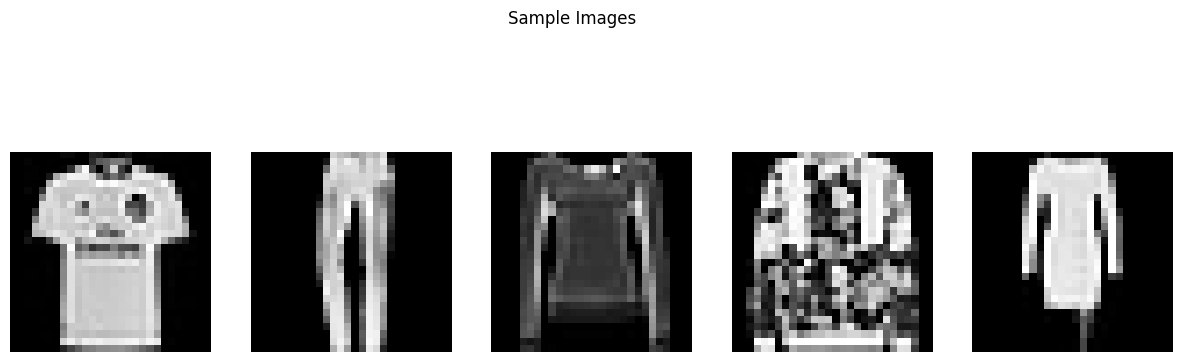

In [8]:
#displaying some images
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    image = df.iloc[i, 1:].values.reshape(28, 28)
    axes[i].imshow(image, cmap='gray')
    axes[i].axis('off')
plt.suptitle("Sample Images")
plt.show()

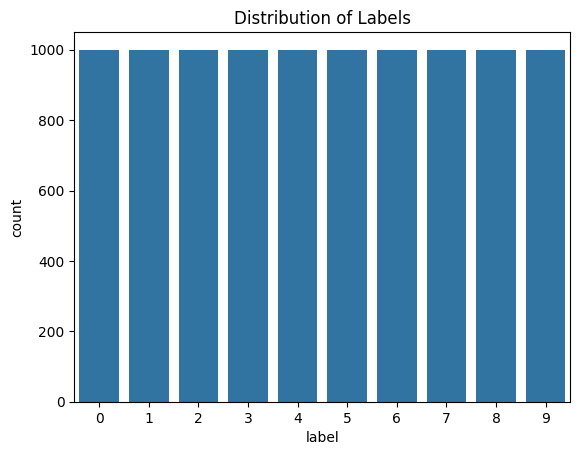

In [9]:
sns.countplot(x='label', data=df)
plt.title('Distribution of Labels')
plt.show()

it looks that each label has 6000 images approx.

## Data Preparation

In [10]:
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values
X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Evaluation

In [11]:
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
train_cluster_labels = kmeans.labels_
test_cluster_labels = kmeans.predict(X_test_scaled)

cluster_centers = kmeans.cluster_centers_
cluster_centers_reshaped = cluster_centers.reshape(n_clusters, 28, 28)


def evaluate_clustering(true_labels, cluster_labels):
    homogeneity = homogeneity_score(true_labels, cluster_labels)
    completeness = completeness_score(true_labels, cluster_labels)
    v_measure = v_measure_score(true_labels, cluster_labels)
    ari = adjusted_rand_score(true_labels, cluster_labels)
    nmi = normalized_mutual_info_score(true_labels, cluster_labels)
    return homogeneity, completeness, v_measure, ari, nmi

train_homogeneity, train_completeness, train_v_measure, train_ari, train_nmi = evaluate_clustering(y_train, train_cluster_labels)

print("Training Evaluation:")
print(f"Homogeneity: {train_homogeneity}")
print(f"Completeness: {train_completeness}")
print(f"V-measure: {train_v_measure}")
print(f"ARI: {train_ari}")
print(f"NMI: {train_nmi}")

Training Evaluation:
Homogeneity: 0.49482818768153186
Completeness: 0.5195254512884099
V-measure: 0.5068761576614046
ARI: 0.34995930818087545
NMI: 0.5068761576614046


In [12]:
def map_clusters_to_labels(true_labels, cluster_labels, n_clusters):
    cluster_label_mappings = {}
    for i in range(n_clusters):
        cluster_points_labels = true_labels[cluster_labels == i]
        if len(cluster_points_labels) > 0: # Check if the cluster is not empty
          most_common_label = Counter(cluster_points_labels).most_common(1)[0][0]
          cluster_label_mappings[i] = most_common_label
        else:
          cluster_label_mappings[i] = -1 # Indicate that this cluster is empty
    return cluster_label_mappings

In [13]:
label_mappings = map_clusters_to_labels(y_train, train_cluster_labels, n_clusters)

predicted_labels_train = [label_mappings.get(cluster, -1) for cluster in train_cluster_labels] # Handle unmapped clusters
predicted_labels_test = [label_mappings.get(cluster, -1) for cluster in test_cluster_labels]

train_indices_to_keep = [i for i, label in enumerate(predicted_labels_train) if label != -1]
test_indices_to_keep = [i for i, label in enumerate(predicted_labels_test) if label != -1]

y_train_mapped = y_train[train_indices_to_keep]
y_test_mapped = y_test[test_indices_to_keep]
predicted_labels_train_mapped = np.array(predicted_labels_train)[train_indices_to_keep]
predicted_labels_test_mapped = np.array(predicted_labels_test)[test_indices_to_keep]


In [14]:
print("\nClassification Report (Training):")
print(classification_report(y_train_mapped, predicted_labels_train_mapped))
print("\nClassification Report (Test):")
print(classification_report(y_test_mapped, predicted_labels_test_mapped))


Classification Report (Training):
              precision    recall  f1-score   support

           0       0.47      0.58      0.51      6000
           1       0.59      0.90      0.71      6000
           2       0.00      0.00      0.00      6000
           3       0.00      0.00      0.00      6000
           4       0.38      0.59      0.46      6000
           5       0.52      0.66      0.59      6000
           6       0.26      0.35      0.30      6000
           7       0.72      0.80      0.76      6000
           8       0.93      0.74      0.83      6000
           9       0.79      0.92      0.85      6000

    accuracy                           0.55     60000
   macro avg       0.47      0.55      0.50     60000
weighted avg       0.47      0.55      0.50     60000


Classification Report (Test):
              precision    recall  f1-score   support

           0       0.46      0.58      0.51      1000
           1       0.59      0.91      0.71      1000
           2

C:\Users\M.ouda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M.ouda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\M.ouda\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classific

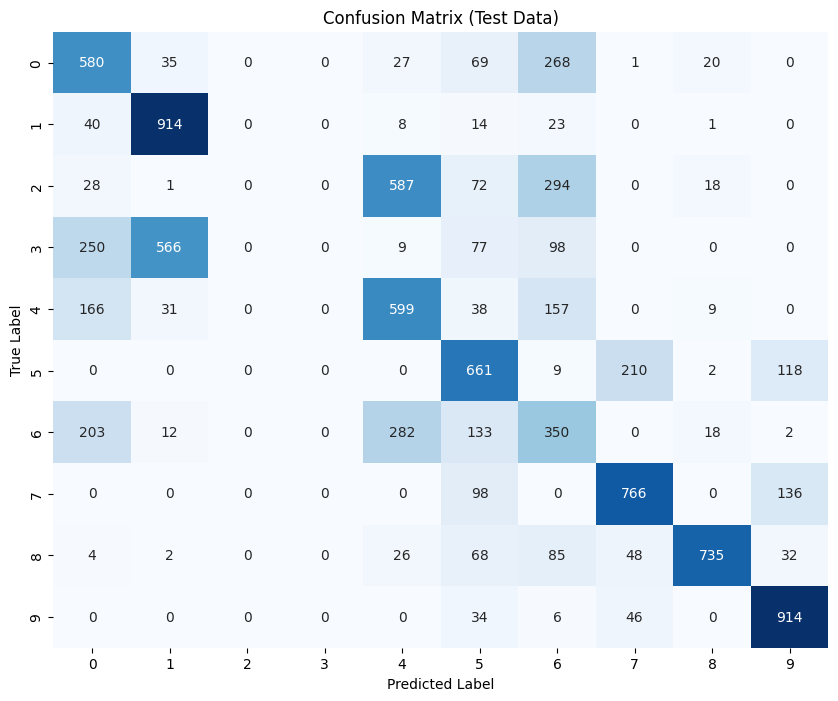

In [15]:
# Confusion matrix (using mapped labels)
cm_train = confusion_matrix(y_train_mapped, predicted_labels_train_mapped)
cm_test = confusion_matrix(y_test_mapped, predicted_labels_test_mapped)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=np.unique(y_test_mapped), yticklabels=np.unique(y_test_mapped))
plt.title('Confusion Matrix (Test Data)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Calculating Accuracy

In [16]:
train_accuracy = accuracy_score(y_train_mapped, predicted_labels_train_mapped)
test_accuracy = accuracy_score(y_test_mapped, predicted_labels_test_mapped)

print(f"Training Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.5546833333333333
Test Accuracy: 0.5519


# Report
Our task was talking about using unsupervised Machine learning (clustering) to cluster 10 labels of fashion. Her is what we did and conclude:
## Imprting Libraries and Loading data
We first imported the training dataset as a .csv file and imported the libraries required for using K-means
## Exploratory Data Analysis (EDA)
we illustrated a sample of images to understand the structure of the dataset given. Fortunetly, no null values existed, but it was hard (for us as human) to distinguish betwen some of those clusters. There were 10 clusters given.
## Cleaning text
we used PCA to reduce the dimensionality of the images, after changing its form from a 28x28 rayscale image into 1 vector
## K-Means results
In fact, the results were not on the best shape. in our first try, we have got too low accuracy (about %2). But after that, we tried again and got %55 accuracy! Some clusters have strong accuracy (like cluster 8), while some clusters were ignored (like clusters 2 and 3). That violation can be resulted due to the disability to work with images, even after using PCA 
